In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, UVFlag, utils
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle
from copy import deepcopy

In [2]:
rawpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/'
#calpath = '/lustre/aoc/projects/hera/agavidia/TimeVariability/CalFitsFix/'
calpath = rawpath
#outpath = '/lustre/aoc/projects/hera/agavidia/TimeVariability/CalFitsFlag/'
outpath = rawpath

In [3]:
JD = '2457548'
#files = glob(calpath+JD+'/'+ 'zen.'+JD+'**'+'fixed.uvcRP.calfits')
rawfiles = glob(rawpath+JD+'/'+'zen.'+JD+'**'+'uvcRP.uvh5')
rawfiles.sort()

In [5]:
rawfiles

['/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.16694.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.17390.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.18086.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.18782.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.19478.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.20173.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.20869.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.21565.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.22261.uvcRP.uvh5',
 '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.22957.uvc

In [6]:
%%time 

for rawfile in rawfiles[0:1]:
    uvc = UVCal()
    uvd = UVData()
    
    filename = rawfile.split('/')[-1]
    tmp = filename.split('.')
    juldate = tmp[1]+'.'+tmp[2]
    #print(juldate)
    calfitsfile = calpath+JD+'/'+ 'zen.'+juldate+'_fixed.uvcRP.calfits'
    flagfile = rawpath+JD+'/'+ 'flag.'+juldate+'.or.uvh5'
    outfile = outpath+JD+'/zen.'+juldate+'.uvcRP.cal.flag.uvh5'
    
    print(calfitsfile)
    print(flagfile)
    print(outfile)
    
    uvc.read_calfits(calfitsfile)
    uvd.read(rawfile)
    
    uvd_calibrated = deepcopy(uvd)
    # Clear the flag array.
    uvd_calibrated.flag_array = np.zeros_like(uvd.flag_array, dtype='bool')
    # Calibrate the data and apply the flags from the calfits file
    utils.uvcalibrate(uvd_calibrated, uvc, inplace=True, prop_flags=True)
    uvf_or = UVFlag(flagfile, mode='flag', copy_flags=True)
    utils.apply_uvflag(uvd_calibrated, uvf_or, inplace=True, unflag_first=False)
    
    uvd_calibrated.write_uvh5(outfile, clobber=True)

/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.16694_fixed.uvcRP.calfits
/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/flag.2457548.16694.or.uvh5
/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/zen.2457548.16694.uvcRP.cal.flag.uvh5
File exists; clobbering
CPU times: user 6.05 s, sys: 1.45 s, total: 7.5 s
Wall time: 7.54 s


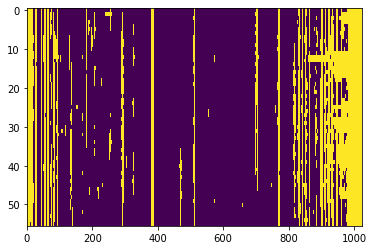

In [7]:
plt.imshow(uvf_or.flag_array.squeeze(), aspect='auto')

In [8]:
calflags = uvd_calibrated.get_flags((9,10,'xx'))

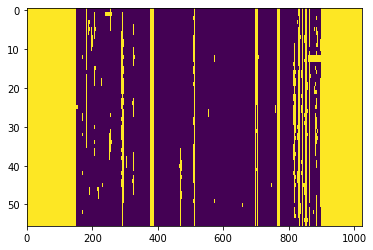

In [9]:
plt.imshow(calflags, aspect='auto')

In [10]:
rawdata = uvd.get_data((9,10,'xx'))
caldata = uvd_calibrated.get_data((9,10,'xx'))

divide by zero encountered in log
divide by zero encountered in true_divide


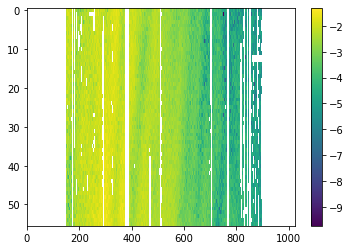

In [11]:
plt.imshow(np.log(np.abs(rawdata))/~calflags, aspect='auto')
plt.colorbar()

divide by zero encountered in log
divide by zero encountered in true_divide


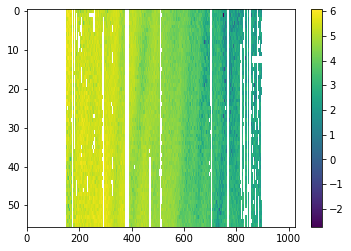

In [12]:
plt.imshow(np.log(np.abs(caldata))/~calflags, aspect='auto')
plt.colorbar()

In [13]:
rawdata.shape

(56, 1024)

In [22]:
uvdsim = UVData()

In [23]:
uvdsim.read('/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/Simulation/zen.2457755.59672.uvCP.uvh5')

In [27]:
simdata = uvdsim.get_data((9,10,'xx'))
simdata.shape

(61, 1024)

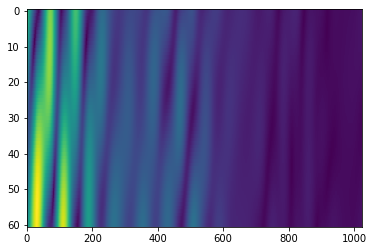

In [26]:
plt.imshow(np.abs(simdata), aspect='auto')

divide by zero encountered in true_divide
invalid value encountered in true_divide
divide by zero encountered in true_divide
invalid value encountered in true_divide


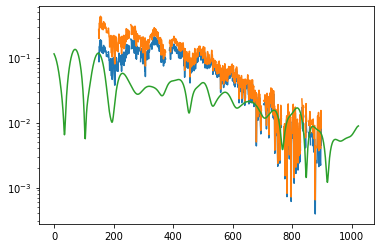

In [28]:
plt.semilogy(np.abs(rawdata[0,:])/~calflags[0,:])
plt.semilogy(np.abs(caldata[0,:]/1e3)/~calflags[0,:])
plt.semilogy(np.abs(simdata[0,:]/1e3))

divide by zero encountered in true_divide
invalid value encountered in true_divide


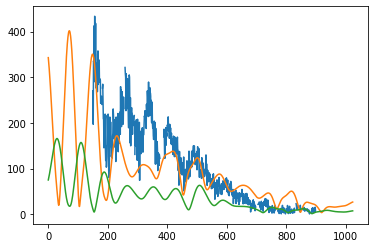

In [35]:
plt.plot(np.abs(caldata[0,:])/~calflags[0,:])
plt.plot(3*np.abs(simdata[0,:]))
plt.plot(np.abs(simdata[60,:]))